In [14]:
%%bash

cd ./build
export LD_LIBRARY_PATH=/users/class171/miniconda3/envs/weather-cnn/lib:$LD_LIBRARY_PATH
cmake .. -DCMAKE_PREFIX_PATH=/users/class171/miniconda3/envs/weather-cnn/lib/python3.12/site-packages/torch/ -DCMAKE_BUILD_TYPE=Release -DFTorch_DIR=~/Ftorchbin -DCMAKE_Fortran_COMPILER=/user-environment/linux-sles15-neoverse_v2/gcc-12.3.0/gcc-13.3.0-rnbf75vyhchi5reyzoadq2jgz4tmue5t/bin/gfortran
cmake --build .

-- Building with Fortran PyTorch coupling
-- Configuring done (0.0s)
-- Generating done (0.1s)
-- Build files have been written to: /users/class171/cnn-in-fortran/src/py_ftorch_compare/build


/bin/sh: /users/class171/miniconda3/envs/weather-cnn/lib/libtinfo.so.6: no version information available (required by /lib64/libreadline.so.7)
/bin/sh: /users/class171/miniconda3/envs/weather-cnn/lib/libtinfo.so.6: no version information available (required by /lib64/libreadline.so.7)


[ 50%] Building Fortran object CMakeFiles/infer_fortran.dir/infer_fortran.f90.o


/bin/sh: /users/class171/miniconda3/envs/weather-cnn/lib/libtinfo.so.6: no version information available (required by /lib64/libreadline.so.7)


[100%] Linking Fortran executable infer_fortran


/bin/sh: /users/class171/miniconda3/envs/weather-cnn/lib/libtinfo.so.6: no version information available (required by /lib64/libreadline.so.7)


[100%] Built target infer_fortran


In [66]:
%%bash

cd ./build
export LD_LIBRARY_PATH=/users/class171/miniconda3/envs/weather-cnn/lib:$LD_LIBRARY_PATH
./infer_fortran /users/class171/models/unet_d5_out1_gpu_L1_traced.pt 100

   2.36427295E-03
   4.77932766E-03
   7.18948664E-03
   9.56188794E-03
   1.20688761E-02
   1.43973418E-02
   1.66794099E-02
   1.90098919E-02
   2.13068407E-02
   2.36872733E-02
   2.59792283E-02
   2.83542201E-02
   3.06626875E-02
   3.30979340E-02
   3.54646407E-02
   3.79388630E-02
   4.03103344E-02
   4.45740633E-02
   4.69622090E-02
   4.92845327E-02
   5.16630784E-02
   5.40682785E-02
   5.63908555E-02
   5.87896556E-02
   6.14030734E-02
   6.37303591E-02
   6.60414174E-02
   6.83813691E-02
   7.10611492E-02
   7.34187663E-02
   7.57935047E-02
   7.83238560E-02
   8.07997435E-02
   8.32175538E-02
   8.55524540E-02
   8.79701674E-02
   9.03140604E-02
   9.26448330E-02
   9.50325653E-02
   9.80395079E-02
  0.101885363    
  0.104204066    
  0.106586643    
  0.108977318    
  0.111461423    
  0.113887869    
  0.116373479    
  0.118772343    
  0.121129893    
  0.123524822    
  0.125859812    
  0.128369302    
  0.130923390    
  0.133284971    
  0.135685787    
  0.138181

0.0020666122436523438
0.0020592212677001953
0.002065896987915039
0.002051830291748047
0.0020439624786376953
0.0020596981048583984
0.0020525455474853516
0.002047300338745117
0.002052783966064453
0.002053976058959961
0.0020568370819091797
0.002056598663330078
0.0020470619201660156
0.00205230712890625
0.002055644989013672
0.002045154571533203
0.0020592212677001953
0.002047300338745117
0.002069711685180664
0.002051115036010742
0.002051830291748047
0.002060413360595703
0.002051830291748047
0.0020623207092285156
0.002054452896118164
0.002058744430541992
0.0020673274993896484
0.002058744430541992
0.002045869827270508
0.0020515918731689453
0.0020623207092285156
0.002055644989013672
0.002052783966064453
0.0020570755004882812
0.002056598663330078
0.0020487308502197266
0.0020503997802734375
0.002046346664428711
0.0020596981048583984
0.0020508766174316406
0.0020477771759033203
0.002061128616333008
0.002033710479736328
0.0020215511322021484
0.0020170211791992188
0.0020287036895751953
0.002027988433

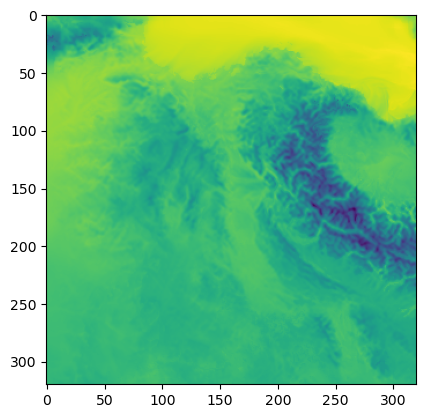

In [68]:
%run ./infer_python.py --filepath /users/class171/models/unet_d5_out1_gpu_L1_traced.pt

In [40]:
fort_out = np.fromfile("./data/output_fortran.dat", dtype=np.float32)
fort_out = fort_out.reshape([320,320])

In [41]:
py_out = np.fromfile("./data/output_python.dat", dtype=np.float32)
py_out = py_out.reshape([320,320])

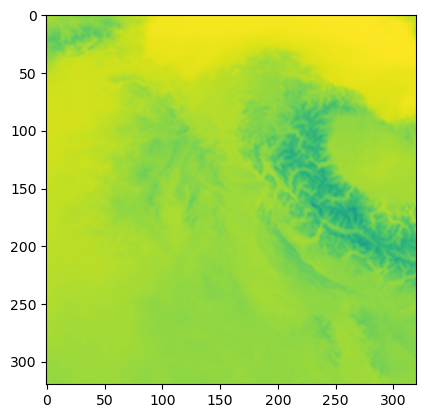

In [46]:
import matplotlib.pyplot as plt
plt.imshow(fort_out.T)

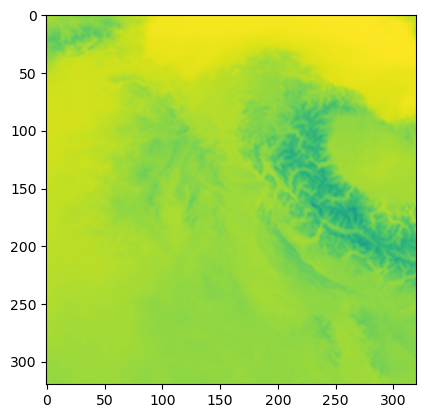

In [45]:
plt.imshow(py_out)

In [48]:
np.count_nonzero(fort_out.T-py_out)

0

In [69]:
f_d3 = np.loadtxt("./data/fortran_d3.txt")
p_d3 = np.loadtxt("./data/python_d3.txt")
f_d5 = np.loadtxt("./data/fortran_d5.txt")
p_d5 = np.loadtxt("./data/python_d5.txt")
f_d7 = np.loadtxt("./data/fortran_d7.txt")
p_d7 = np.loadtxt("./data/python_d7.txt")

In [70]:
f_d3[1:] = f_d3[1:]-f_d3[:-1]
f_d5[1:] = f_d5[1:]-f_d5[:-1]
f_d7[1:] = f_d7[1:]-f_d7[:-1]

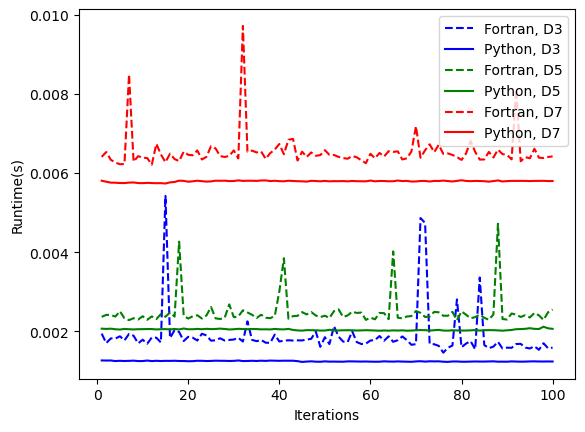

In [75]:
plt.plot(range(1,101),f_d3,'b--',label='Fortran, D3')
plt.plot(range(1,101),p_d3,'b',label='Python, D3')
plt.plot(range(1,101),f_d5,'g--',label='Fortran, D5')
plt.plot(range(1,101),p_d5,'g',label='Python, D5')
plt.plot(range(1,101),f_d7,'r--',label='Fortran, D7')
plt.plot(range(1,101),p_d7,'r',label='Python, D7')
plt.xlabel("Iterations")
plt.ylabel("Runtime(s)")
plt.legend()